# TP2 - Ejercicio 6

## Consigna

![imagen](consigna.png)


# Resolución
<div class="alert alert-danger">
<strong>Somos concientes de que hay errores, seguimos debuggeandolo.</strong>
</div>

## Interpretación del problema

El problema nos da como dato tres mediciones con tres instrumentos distintos. Cada uno de estas mediciones se corresponden con valores distintos. Entre ellos encontramos $V_{m+}$, $V_{|me|}$ y $V_{med}$. Con estos tres valores debemos calcular:

* $V_{PP}$
* $\delta$
* $V_{e}$ (AC+DC)

Junto con cada valor debemos expresar la incertidumbre asociada. Finalmente, se deben simular los resultados obtenidos.


### Consideraciones
Recordemos que para el caso de una señal cuadrada sabemos que existen dos ecuaciones que modelan su comportamiento luego del pasar por el capacitor de acople (es decir midiendo en AC). 

\begin{equation}
    \left\{
    V_{PP} = V_{m+} + V_{m-} \atop
    V_{m+}\cdot \tau = V_{m-} \cdot (T - \tau)
    \right.
\end{equation}

Donde trabajando con las ecuaciones podemos llegar a las siguientes expresiones

\begin{equation}
    \left\{
    V_{m-} = V_{PP} \cdot \delta \atop
    V_{m+} = V_{PP} \cdot (1 - \delta)
    \right.
\end{equation}

Siempre que $\delta = \frac{T}{\tau}$.

Las ecuaciones que relacionan los parámetros que podemos medir con los parámetros característicos de la señal son las siguientes:


\begin{eqnarray}
    V_{|me|} = |V_{m+}| \cdot \delta + |V_{m-}| \cdot (1 - \delta) \\
    V_{med} = |V_{m+}| \cdot \delta - |V_{m-}| \cdot (1 - \delta)  \\
    \delta = 1 - \frac{V_{m+}}{V_{PP}} \\
    V_{e} (AC+DC) = \sqrt{V_{e_{AC}}^{2} + V_{med}^{2}}
\end{eqnarray}

Debemos tener en consideración que para calcular el valor de $V_{e_{AC}}$ precisamos corregir la medición de alguno de los dos primeros voltímetros.

## Cálculo de $\delta$

Donde si sumamos las dos primeras ecuaciones y consideramos que $|V_{m+}| = V_{m+}$ nos queda,

\begin{equation}
    V_{|me|} + V_{med} = 2  V_{m+} \cdot \delta 
\end{equation}

Por lo que podemos encontrar la primer ecuación que nos interesa:

<div class="alert alert-success">
\begin{equation}
    \delta = \frac{V_{|me|} + V_{med}}{2 V_{m+}}
\end{equation}
</div>

## Cálculo de $V_{PP}$

A partir de la tercera ecuación podemos llegar a una expresiónde calculo para $V_{PP}$,

\begin{equation}
    \delta = 1 - \frac{V_{m+}}{V_{PP}}
\end{equation}

Reescribiendo llegamos a,

\begin{equation}
    V_{PP} = \dfrac{V_{m+}}{(1 - \delta)}
\end{equation}

Donde si insertamos la ecuación utilizada para calcular el $\delta$ nos queda, 

\begin{equation}
    V_{PP} = \dfrac{V_{m+}}{(1 - \frac{V_{|me|} + V_{med}}{2 V_{m+}})} = \dfrac{V_{m+}}{\frac{2 V_{m+} - V_{|me|} - V_{med}}{2 V_{m+}}}
\end{equation}

Finalmente:

<div class="alert alert-success">
\begin{equation}
     V_{PP} = \dfrac{2 V_{m+}^{2}}{2 V_{m+} - V_{|me|} - V_{med}}
\end{equation}
</div>



## Cálculo de $V_{e_{AC}}$

Esta expresión la podemos sacar a partir de cualquiera de las mediciones que se hagan en alterna, es decir podemos elegir entre el voltímetro 1 y el voltímetro 2. Otra opción sería considerar ambas mediciones para reducir el error cometido, pero para simplificar vamos a tomar una sola de las medidas, la que menos error presente originalmente. 

En este caso el multímetro con menos error en la medición AC es la del voltímetro 2 que presenta $\pm(0.5\% + 2d)$.

Por tanto el principio de detección utilizado será mediante valor medio del módulo $V_{|me|}$. 

Segun vimos en clase, el factor de corrección a utilizar para estos casos en una señal cuadrada es el siguiente:

\begin{equation}
     F_{|me|e\square} = \dfrac{\sqrt{2}}{\pi \sqrt{\delta(1-\delta)}}
\end{equation}

Por tanto la expresión de calculo de $V_{e_{AC}}$ será:

<div class="alert alert-success">
\begin{equation}
     V_{e_{AC}} = V_{|me|} \cdot F_{|me|e\square} = V_{|me|} \cdot \dfrac{\sqrt{2}}{\pi \sqrt{\delta(1-\delta)}}
\end{equation}
</div>



# Experimentación
Empezamos a pythonear:

In [189]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt 
# Módulos para Jupyter (mejores graficos!)
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 150 # 200 e.g. is really fine, but slower

## Determinación de $\delta$, $V_{PP}$ y $V_{e_{AC}}$
Anotamos las mediciones de los instrumentos y las constantes de conversión de cada uno.

In [190]:
Vi_vm   =  2.69  # Voltímetro 1
Vi_vme  =  2.026 # Voltímetro 2
Vi_vmed = -0.807 # Voltímetro 3

K_vm    = np.pi/(np.sqrt(2))
K_vme   = np.pi/(2*np.sqrt(2))

Ahora determinamos los parametros que luego utilizaremos para calcular,

In [191]:
V_vm  = Vi_vm / K_vm
V_vme = Vi_vme / K_vme
V_dc  = Vi_vmed

print("Tensión Máxima: %0.3f V" % (V_vm))
print("Tensión Media en Módulo: %0.3f V"% (V_vme))
print("Tensión DC: %0.3f V" % (V_dc))

Tensión Máxima: 1.211 V
Tensión Media en Módulo: 1.824 V
Tensión DC: -0.807 V


Ahora utilizamos las expresiones de calculo previamente explicitadas

In [192]:
delta   = (V_vme + V_dc)/(2*V_vm)
Vpp     = 2*(V_vm**2) / (2*V_vm - V_vme - V_dc)
Ve_AC   = V_vme * (np.sqrt(2)/(np.pi * np.sqrt(delta*(1-delta))))
Ve_ACDC = np.sqrt(V_dc**2 + Ve_AC**2)

print("Duty cycle: %0.2f" % (delta))
print("Tensión Pico a Pico: %0.3fV" % (Vpp))
print("Tensión eficaz en AC: %0.3fV" % (Ve_AC))
print("Tensión RMS (AC+DC): %0.3fV" % (Ve_ACDC))

Duty cycle: 0.42
Tensión Pico a Pico: 2.088V
Tensión eficaz en AC: 1.664V
Tensión RMS (AC+DC): 1.849V


## Simulación

In [193]:
# Defino algunas funciones genericas
def TrueRMS(signal):
    return np.sqrt((signal**2).mean())

def vmRMS(signal):
    Km = 1/np.sqrt(2)
    return np.amax(signal)*Km

Text(15, -2, '$V_{DC}$=-0.81V')

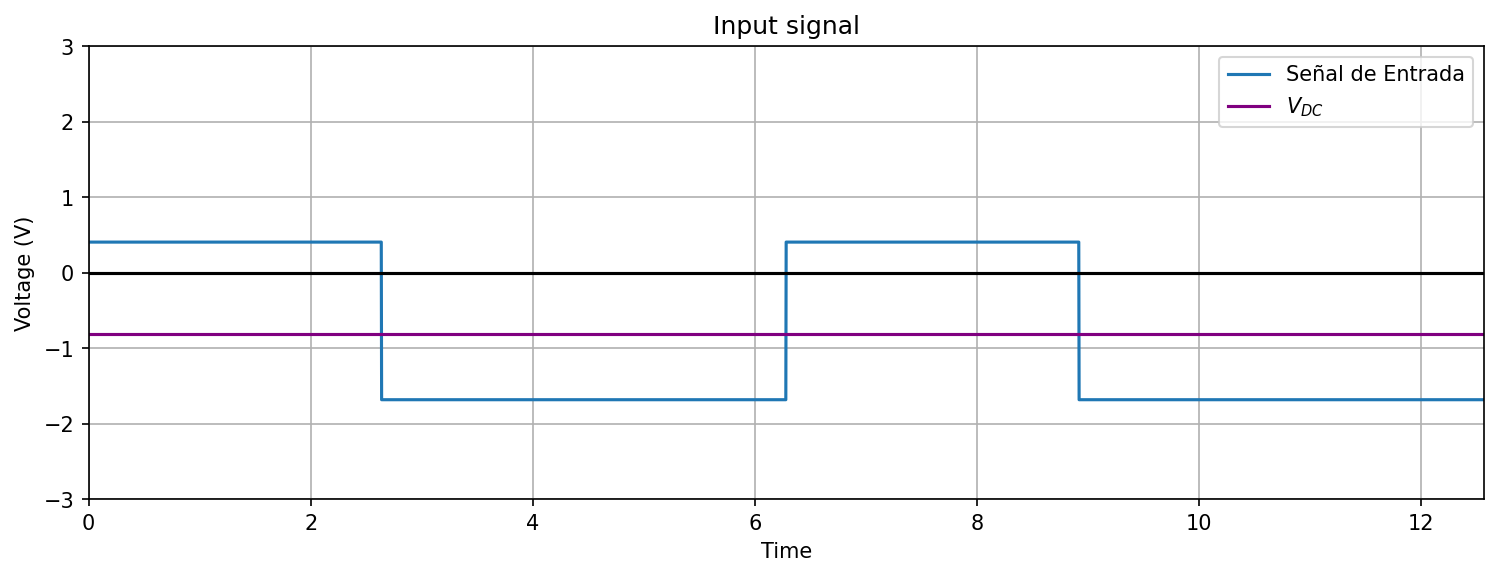

In [194]:
# Definimos la cantidad de ciclos que vamos a representar de la señal
CANT_CICLOS = 2

x = np.linspace(0, CANT_CICLOS*2*np.pi, 4000, endpoint = False) 
# Generamos la señal cuadrada de toda la vida (no es lo mismo que la de signal.square)
cuadrada = (signal.square(x, duty=delta) + 1)/2

# Hay que restar por np.mean para sacarle la media que aporta la señal generada (que depende del duty)
# Por ejemplo la señal entre 1 y 0 con un duty del 50% vas a tener una media del 0.5, pero si el duty es de 20%
# entonces la media va a ser de 0.2. Nosotros queremos eliminar eso para que ya este centrada en cero el valor 
# medio y podamos nosotros sumarle el valor calculado Vdc
y_in = (Vpp * cuadrada) - np.mean(Vpp * cuadrada) + V_dc 


fig, ax = plt.subplots()
ax.plot(x,y_in,label='Señal de Entrada')
ax.set(xlabel='Time', ylabel='Voltage (V)',
       title='Input signal')
ax.set_ylim(-3, 3)
ax.set_xlim(0, CANT_CICLOS*2*np.pi)
ax.axline((0,0),(CANT_CICLOS*2*np.pi,0), c='black')
ax.grid()

# Adding the DC value
Vdc_in = y_in.mean()
ax.axline((0,Vdc_in),(40,Vdc_in), c='purple', label='$V_{DC}$')
ax.legend()

# Adding annotation
ax.annotate('$V_{DC}$='+str(np.round(Vdc_in,2))+'V', xy=(20, Vdc_in), xytext=(15, -2),
            arrowprops=dict(facecolor='black', shrink=0.01))

Text(15, -2, '$V_{DC}$=-0.0V')

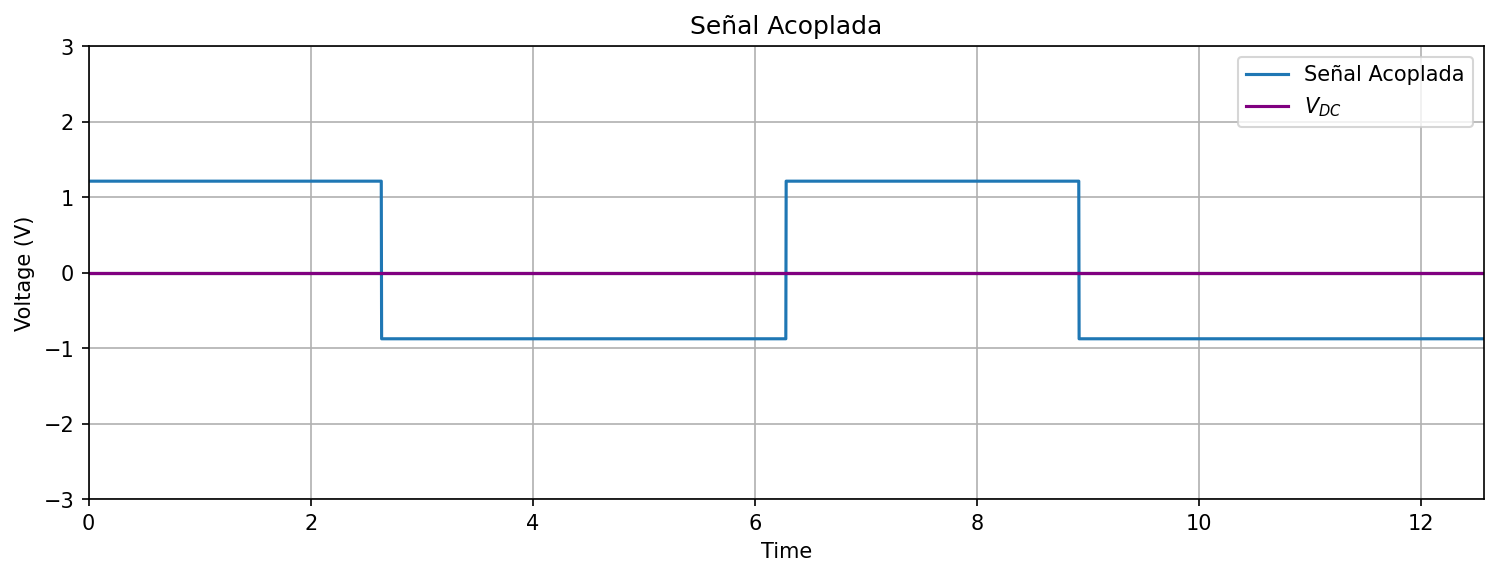

In [195]:
y_C = y_in - Vdc


fig, ax = plt.subplots()
ax.plot(x,y_C,label='Señal Acoplada')
ax.set(xlabel='Time', ylabel='Voltage (V)',
       title='Señal Acoplada')
ax.set_ylim(-3, 3)
ax.set_xlim(0, CANT_CICLOS*2*np.pi)
ax.axline((0,0),(CANT_CICLOS*2*np.pi,0), c='black')
ax.grid()

# Adding the DC value
Vdc_C = y_C.mean()
ax.axline((0,Vdc_C),(CANT_CICLOS*2*np.pi,Vdc_C), c='purple',label='$V_{DC}$')
ax.legend()

# Adding annotation
ax.annotate('$V_{DC}$='+str(np.round(Vdc_C,2))+'V', xy=(20, Vdc_C), xytext=(15, -2),
            arrowprops=dict(facecolor='black', shrink=0.01))

Text(7, -2, '$V_{i}\\ (V_{m+})$=0.86V')

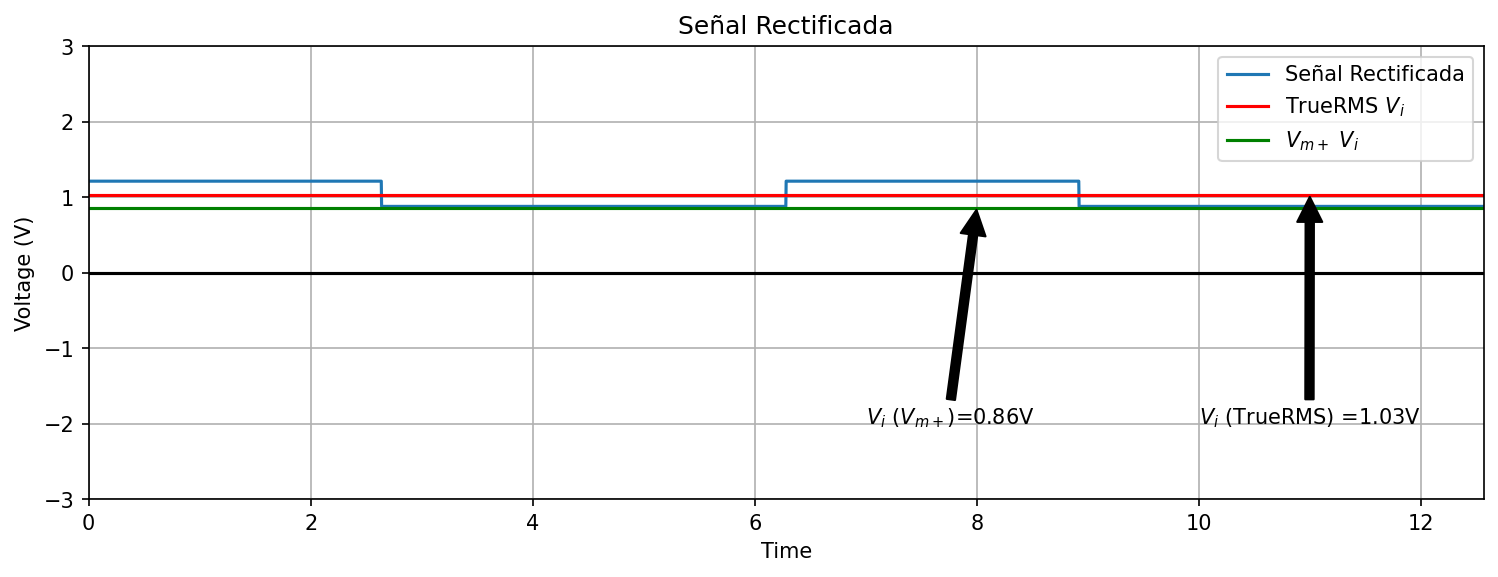

In [196]:
y_rect = np.abs(y_C)


fig, ax = plt.subplots()
ax.plot(x,y_rect,label='Señal Rectificada')
ax.set(xlabel='Time', ylabel='Voltage (V)',
       title='Señal Rectificada')
ax.set_ylim(-3, 3)
ax.set_xlim(0, CANT_CICLOS*2*np.pi)
ax.axline((0,0),(CANT_CICLOS*2*np.pi,0), c='black')
ax.grid()

# Calculo el valor RMS que nos devolvería un tester TrueRMS
True_RMS_Val = TrueRMS(y_rect)
ax.axline((0,True_RMS_Val),(CANT_CICLOS*2*np.pi,True_RMS_Val), c='red',label='TrueRMS $V_{i}$')

# Calculo el valor RMS que nos devolvería un tester Vm+
vm_RMS_Val = vmRMS(y_rect)
ax.axline((0,vm_RMS_Val),(CANT_CICLOS*2*np.pi,vm_RMS_Val), c='green',label='$V_{m+}\ V_{i}$')

ax.legend()

# Adding annotation
ax.annotate('$V_{i}$ (TrueRMS) ='+str(np.round(True_RMS_Val,2))+'V', xy=(11, True_RMS_Val), xytext=(10, -2),
            arrowprops=dict(facecolor='black', shrink=0.01))

ax.annotate('$V_{i}\ (V_{m+})$='+str(np.round(vm_RMS_Val,2))+'V', xy=(8, vm_RMS_Val), xytext=(7, -2),
            arrowprops=dict(facecolor='black', shrink=0.01))